# Make median-normalized, false-colour RGB images of the NGVS-VERTICO galaxies

Isaac Cheng - November 2021

Convert i-band, g-band, and u-band data to red, green, and blue channels, respectively. Note that we ignore the flag maps for the RGB images.


In [1]:
import re
import astropy.units as u
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
# 
# Load my own packages
# 
import sys
sys.path.append("/arc/home/IsaacCheng/coop_f2021/packages")
import fits_utils as fu
import plot_utils as pu
# # Reload my packages
# import importlib
# importlib.reload(fu)
# importlib.reload(pu)
GALDIST = 16.5 * u.Mpc  # distance to centre of Virgo cluster. Assume 10% uncertainty

# Make individual RGB images


Making IC3392 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


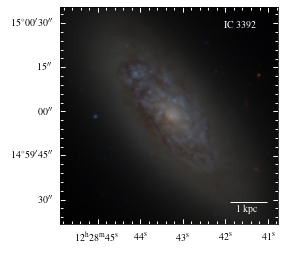

Done!


In [14]:
GALAXIES = [
    "IC3392",
    "NGC4189",  # ignored flag map, but bad results
    "NGC4192",
    "NGC4216",  # has unflagged foreground star
    "NGC4222",
    "NGC4254",
    "NGC4294",
    "NGC4298",
    "NGC4299",
    "NGC4302",
    "NGC4321",
    "NGC4330",
    "NGC4351",
    "NGC4380",
    "NGC4383",
    "NGC4388",
    "NGC4396",
    "NGC4402",
    "NGC4405",
    "NGC4419",
    "NGC4424",
    "NGC4450",
    "NGC4501",
    "NGC4522",
    "NGC4532",
    "NGC4535",
    "NGC4548",
    "NGC4567",
    "NGC4568",
    "NGC4569",
    "NGC4579",
    "NGC4580",
    "NGC4606",  # flag map too intrusive
    "NGC4607",
    "NGC4651",
    "NGC4654",
    "NGC4689",
    "NGC4694",
]

INCLINATIONS = [
    68,
    42,  # ignored flag map, but bad results
    83,
    90,  # has unflagged foreground star
    90,
    39,
    74,
    52,
    14,
    90,
    32,
    90,
    48,
    61,
    56,
    83,
    83,
    80,
    46,
    74,
    61,
    51,
    65,
    82,
    64,
    48,
    37,
    49,
    70,
    69,
    40,
    46,
    69,  # flag map too intrusive
    90,
    53,
    61,
    38,
    62,
]  # degrees

for galaxy, i in zip(GALAXIES, INCLINATIONS):
    print("Making", galaxy, "RGB image")
    galpath = f"/arc/home/IsaacCheng/coop_f2021/galaxies/{galaxy}/"
    # 2 arcsec pixel CO data (purely to cutout optical data to match CO data)
    if galaxy == "NGC4321":  # no 9 arcsec data since native is 10 arcsec
        Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3.1/native/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_round_mom0_Kkms-1.fits"
    else:
        Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3/9arcsec/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_9as_round_mom0_Kkms-1.fits"
    Ico_data, co_header = fits.getdata(Ico_path, header=True)
    co_wcs = WCS(co_header)
    # "red" channel (i-band)
    iband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_i_data.fits"
    # "green" channel (g-band)
    gband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_g_data.fits"
    # "blue" channel (u-band)
    uband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_u_data.fits"
    iband_data_uncut, iband_header_uncut = fits.getdata(iband_path, header=True)
    gband_data_uncut, gband_header_uncut = fits.getdata(gband_path, header=True)
    uband_data_uncut, uband_header_uncut = fits.getdata(uband_path, header=True)
    # 
    # Cutout optical data to extent of CO data (optional)
    # 
    iband_data, iband_wcs = fu.cutout_to_target(
        iband_data_uncut, WCS(iband_header_uncut), Ico_data, co_wcs
    )
    gband_data, gband_wcs = fu.cutout_to_target(
        gband_data_uncut, WCS(gband_header_uncut), Ico_data, co_wcs
    )
    uband_data, uband_wcs = fu.cutout_to_target(
        uband_data_uncut, WCS(uband_header_uncut), Ico_data, co_wcs
    )
    # 
    # Median-normalize data on a logarithmic scale and make RGB array
    # 
    rgb_data = pu.lognorm_median(iband_data, gband_data, uband_data, a=1000, norm_factor=1000)
    # 
    # Plot
    # 
    fig, ax = plt.subplots(subplot_kw={"projection": uband_wcs})
    ax.imshow(rgb_data, interpolation="none")
    ax.tick_params(color="w")
    pu.add_scalebar(ax, uband_wcs, dist=GALDIST, color="w")
    ax.set_xlabel("RA (J2000)")
    ax.set_ylabel("Dec (J2000)")
    ax.grid(False)
    # 
    # Add name of galaxy
    # 
    high_i_str = "*" if i >= 80 else ""
    ax.text(
        0.9,
        0.9,
        re.sub(r"(\d+)", " \\1", galaxy) + high_i_str,
        c="w",
        ha="right",
        transform=ax.transAxes,
    )
    fig.savefig(galpath + f"{galaxy}_rgb.pdf")
    plt.close()
print("Done!")

## Version for beamer slides


/opt/conda/lib/python3.8/contextlib.py:113: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  return next(self.gen)
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making IC3392 RGB image
Making NGC4189 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4192 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4216 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4222 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4254 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4294 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4298 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4299 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4302 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4321 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4330 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4351 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4380 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


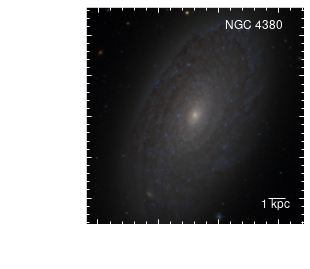

Making NGC4383 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4388 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4396 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4402 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4405 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4419 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4424 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4450 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4501 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4522 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4532 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4535 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4548 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4567 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4568 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4569 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4579 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4580 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4606 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4607 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4651 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4654 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4689 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4694 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Done!


In [2]:
GALAXIES = [
    "IC3392",
    "NGC4189",  # ignored flag map, but bad results
    "NGC4192",
    "NGC4216",  # has unflagged foreground star
    "NGC4222",
    "NGC4254",
    "NGC4294",
    "NGC4298",
    "NGC4299",
    "NGC4302",
    "NGC4321",
    "NGC4330",
    "NGC4351",
    "NGC4380",
    "NGC4383",
    "NGC4388",
    "NGC4396",
    "NGC4402",
    "NGC4405",
    "NGC4419",
    "NGC4424",
    "NGC4450",
    "NGC4501",
    "NGC4522",
    "NGC4532",
    "NGC4535",
    "NGC4548",
    "NGC4567",
    "NGC4568",
    "NGC4569",
    "NGC4579",
    "NGC4580",
    "NGC4606",  # flag map too intrusive
    "NGC4607",
    "NGC4651",
    "NGC4654",
    "NGC4689",
    "NGC4694",
]

INCLINATIONS = [
    68,
    42,  # ignored flag map, but bad results
    83,
    90,  # has unflagged foreground star
    90,
    39,
    74,
    52,
    14,
    90,
    32,
    90,
    48,
    61,
    56,
    83,
    83,
    80,
    46,
    74,
    61,
    51,
    65,
    82,
    64,
    48,
    37,
    49,
    70,
    69,
    40,
    46,
    69,  # flag map too intrusive
    90,
    53,
    61,
    38,
    62,
]  # degrees

with plt.style.context("/arc/home/IsaacCheng/coop_f2021/stylesheets/beamer.mplstyle"):
    for galaxy, i in zip(GALAXIES, INCLINATIONS):
        print("Making", galaxy, "RGB image")
        galpath = f"/arc/home/IsaacCheng/coop_f2021/galaxies/{galaxy}/"
        # 2 arcsec pixel CO data (purely to cutout optical data to match CO data)
        if galaxy == "NGC4321":  # no 9 arcsec data since native is 10 arcsec
            Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3.1/native/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_round_mom0_Kkms-1.fits"
        else:
            Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3/9arcsec/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_9as_round_mom0_Kkms-1.fits"
        Ico_data, co_header = fits.getdata(Ico_path, header=True)
        co_wcs = WCS(co_header)
        # "red" channel (i-band)
        iband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_i_data.fits"
        # "green" channel (g-band)
        gband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_g_data.fits"
        # "blue" channel (u-band)
        uband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_u_data.fits"
        iband_data_uncut, iband_header_uncut = fits.getdata(iband_path, header=True)
        gband_data_uncut, gband_header_uncut = fits.getdata(gband_path, header=True)
        uband_data_uncut, uband_header_uncut = fits.getdata(uband_path, header=True)
        # 
        # Cutout optical data to extent of CO data (optional)
        # 
        iband_data, iband_wcs = fu.cutout_to_target(
            iband_data_uncut, WCS(iband_header_uncut), Ico_data, co_wcs
        )
        gband_data, gband_wcs = fu.cutout_to_target(
            gband_data_uncut, WCS(gband_header_uncut), Ico_data, co_wcs
        )
        uband_data, uband_wcs = fu.cutout_to_target(
            uband_data_uncut, WCS(uband_header_uncut), Ico_data, co_wcs
        )
        # 
        # Median-normalize data on a logarithmic scale and make RGB array
        # 
        rgb_data = pu.lognorm_median(iband_data, gband_data, uband_data, a=1000, norm_factor=1000)
        # 
        # Plot
        # 
        fig, ax = plt.subplots(subplot_kw={"projection": uband_wcs})
        ax.imshow(rgb_data, interpolation="none")
        ax.tick_params(color="w")
        pu.add_scalebar(ax, uband_wcs, dist=GALDIST, color="w")
        ax.set_xlabel("RA (J2000)")
        ax.set_ylabel("Dec (J2000)")
        ax.grid(False)
        # 
        # Add name of galaxy
        # 
        high_i_str = "*" if i >= 80 else ""
        ax.text(
            0.9,
            0.9,
            re.sub(r"(\d+)", " \\1", galaxy) + high_i_str,
            c="w",
            ha="right",
            transform=ax.transAxes,
        )
        fig.savefig(galpath + f"{galaxy}_rgb_beamer.pdf")
        # Show plot for NGC 4380
        if galaxy == "NGC4380":
            plt.show()
        else:
            plt.close()
print("Done!")

In [3]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None)


['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans10-bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmonoproplt10-oblique.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-Regular.otf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromandunh10-oblique.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-Italic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmonoprop10-oblique.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman8-regular.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans9-regular.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromandunh10-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/StandardSymbolsPS.otf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusRoman-BoldItalic.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow

# Make RGB Image Mosaic

Only the 36 galaxies used in our lookup table


Making IC3392 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4192 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4216 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4222 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4254 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4294 RGB image
Making NGC4298 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4299 RGB image
Making NGC4302 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4321 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4330 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4351 RGB image
Making NGC4380 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4383 RGB image
Making NGC4388 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4396 RGB image
Making NGC4402 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4405 RGB image
Making NGC4419 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4424 RGB image
Making NGC4450 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4501 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4522 RGB image
Making NGC4532 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4535 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4548 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4567 RGB image
Making NGC4568 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4569 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4579 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4580 RGB image
Making NGC4607 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4651 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4654 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4689 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4694 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


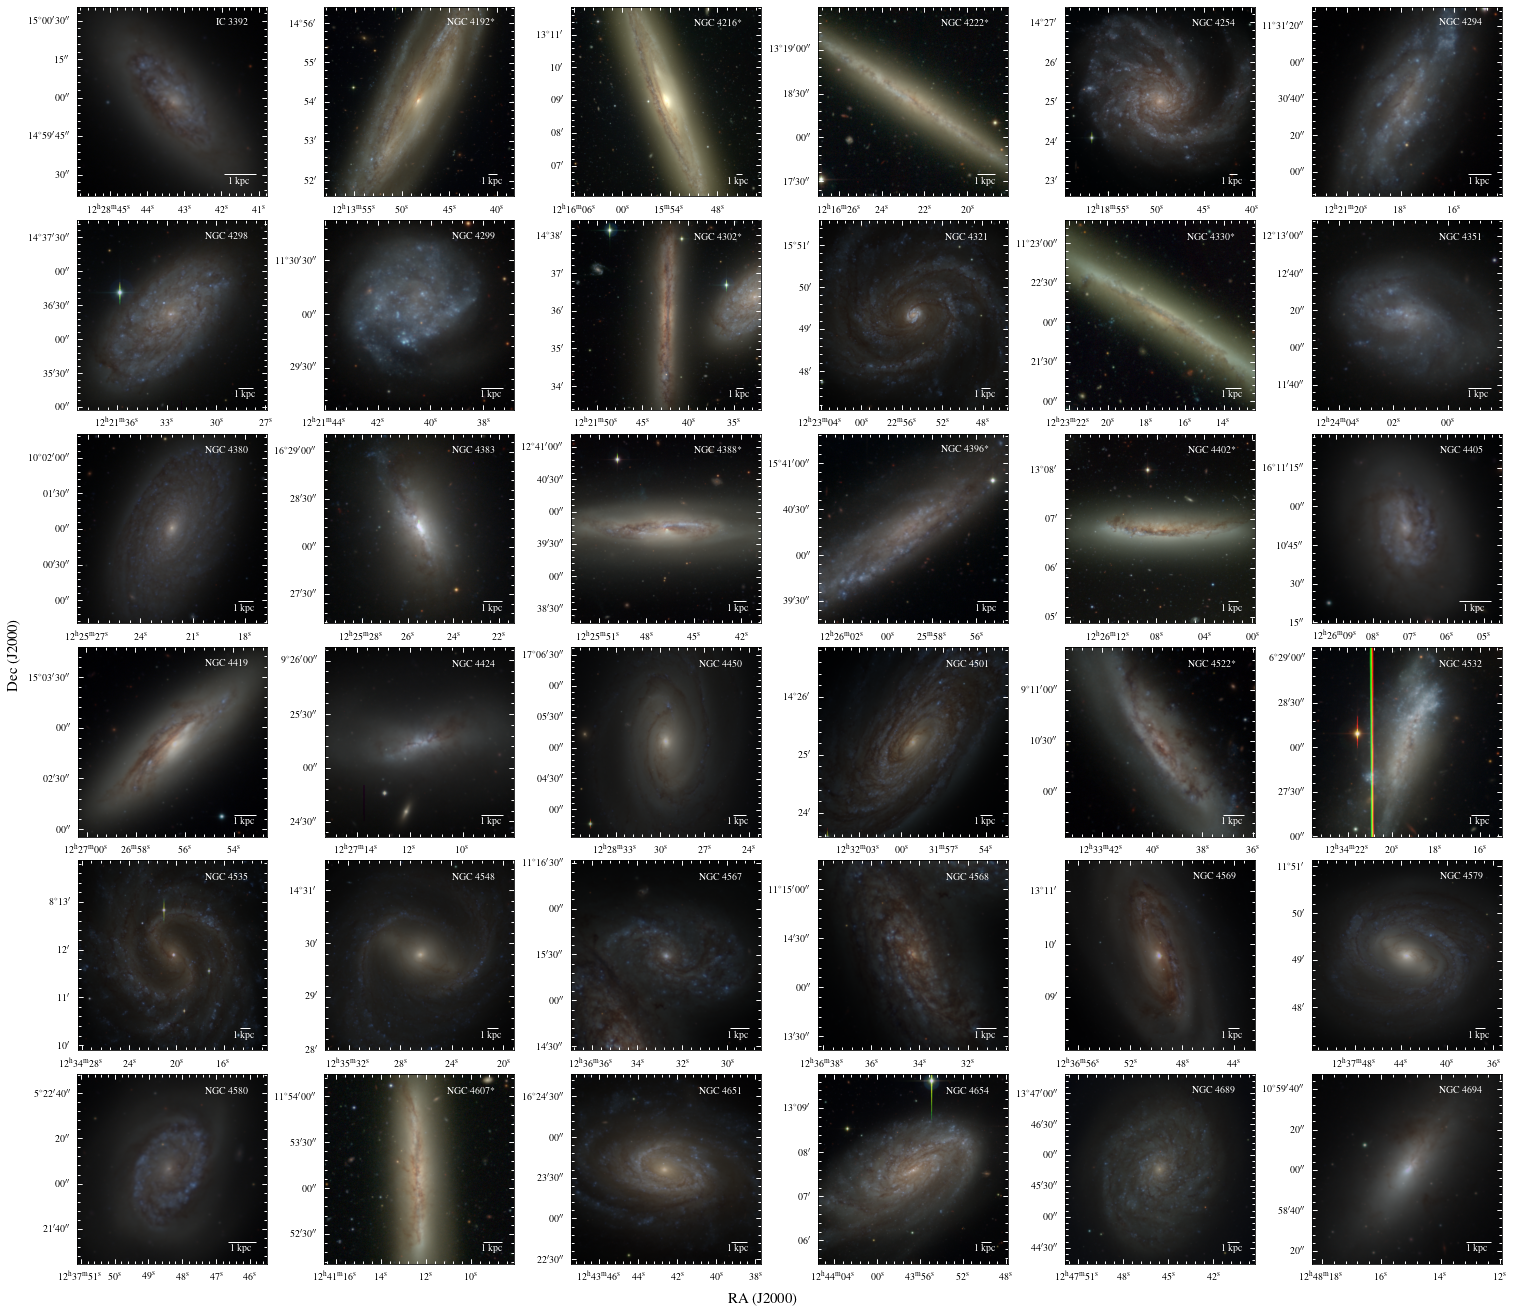

In [2]:
GALAXIES = [
    "IC3392",
    # "NGC4189",  # ignored flag map, but bad results
    "NGC4192",
    "NGC4216",  # has unflagged foreground star
    "NGC4222",
    "NGC4254",
    "NGC4294",
    "NGC4298",
    "NGC4299",
    "NGC4302",
    "NGC4321",
    "NGC4330",
    "NGC4351",
    "NGC4380",
    "NGC4383",
    "NGC4388",
    "NGC4396",
    "NGC4402",
    "NGC4405",
    "NGC4419",
    "NGC4424",
    "NGC4450",
    "NGC4501",
    "NGC4522",
    "NGC4532",
    "NGC4535",
    "NGC4548",
    "NGC4567",
    "NGC4568",
    "NGC4569",
    "NGC4579",
    "NGC4580",
    # "NGC4606",  # flag map too intrusive
    "NGC4607",
    "NGC4651",
    "NGC4654",
    "NGC4689",
    "NGC4694",
]
INCLINATIONS = [
    68,
    # 42,  # ignored flag map, but bad results
    83,
    90,  # has unflagged foreground star
    90,
    39,
    74,
    52,
    14,
    90,
    32,
    90,
    48,
    61,
    56,
    83,
    83,
    80,
    46,
    74,
    61,
    51,
    65,
    82,
    64,
    48,
    37,
    49,
    70,
    69,
    40,
    46,
    # 69,  # flag map too intrusive
    90,
    53,
    61,
    38,
    62,
]  # degrees

NROWS = 6
NCOLS = 6
fig = plt.figure(figsize=(21, 18))
for ax_num, galaxy, i in zip(range(1, NROWS * NCOLS + 1), GALAXIES, INCLINATIONS):
    print("Making", galaxy, "RGB image")
    galpath = f"/arc/home/IsaacCheng/coop_f2021/galaxies/{galaxy}/"
    # 2 arcsec pixel CO data (purely to cutout optical data to match CO data)
    if galaxy == "NGC4321":  # no 9 arcsec data since native is 10 arcsec
        Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3.1/native/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_round_mom0_Kkms-1.fits"
    else:
        Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3/9arcsec/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_9as_round_mom0_Kkms-1.fits"
    Ico_data, co_header = fits.getdata(Ico_path, header=True)
    co_wcs = WCS(co_header)
    # "red" channel (i-band)
    iband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_i_data.fits"
    # "green" channel (g-band)
    gband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_g_data.fits"
    # "blue" channel (u-band)
    uband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_u_data.fits"
    iband_data_uncut, iband_header_uncut = fits.getdata(iband_path, header=True)
    gband_data_uncut, gband_header_uncut = fits.getdata(gband_path, header=True)
    uband_data_uncut, uband_header_uncut = fits.getdata(uband_path, header=True)
    # 
    # Cutout optical data to extent of CO data (optional)
    # 
    iband_data, iband_wcs = fu.cutout_to_target(
        iband_data_uncut, WCS(iband_header_uncut), Ico_data, co_wcs
    )
    gband_data, gband_wcs = fu.cutout_to_target(
        gband_data_uncut, WCS(gband_header_uncut), Ico_data, co_wcs
    )
    uband_data, uband_wcs = fu.cutout_to_target(
        uband_data_uncut, WCS(uband_header_uncut), Ico_data, co_wcs
    )
    # 
    # Median-normalize data on a logarithmic scale and make RGB array
    # 
    rgb_data = pu.lognorm_median(iband_data, gband_data, uband_data, a=1000, norm_factor=1000)
    # 
    # Plot
    # 
    ax = fig.add_subplot(NROWS, NCOLS, ax_num, projection=uband_wcs)
    ax.imshow(rgb_data)
    ax.tick_params(color="w")
    pu.add_scalebar(ax, uband_wcs, dist=GALDIST, color="w")
    # Hide RA and Dec axes labels
    ax.coords[0].set_axislabel(" ", minpad=0)
    ax.coords[1].set_axislabel(" ", minpad=0)
    ax.grid(False)
    # 
    # Add name of galaxy
    # 
    high_i_str = "*" if i >= 80 else ""
    ax.text(
        0.9,
        0.9,
        re.sub(r"(\d+)", " \\1", galaxy) + high_i_str,
        c="w",
        ha="right",
        transform=ax.transAxes,
    )
fig.text(0.5, 0.0, "RA (J2000)", ha="center", fontsize=15)
fig.text(0.0, 0.5, "Dec (J2000)", va="center", rotation="vertical", fontsize=15)
plt.subplots_adjust(left=0.035, right=1.0, bottom=0.03, top=1.0, wspace=0.1, hspace=0.125)
fig.savefig("/arc/home/IsaacCheng/coop_f2021/galaxies/rgb_mosaic.pdf")
plt.show()

## Version for beamer slides


/opt/conda/lib/python3.8/contextlib.py:113: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  return next(self.gen)
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making IC3392 RGB image
Making NGC4192 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4216 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4222 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4254 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4294 RGB image
Making NGC4298 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4299 RGB image
Making NGC4302 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4321 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4330 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4351 RGB image
Making NGC4380 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4383 RGB image
Making NGC4388 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4396 RGB image
Making NGC4402 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4405 RGB image
Making NGC4419 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4424 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4450 RGB image
Making NGC4501 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4522 RGB image
Making NGC4532 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4535 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4548 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4567 RGB image
Making NGC4568 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4569 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4579 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4580 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4607 RGB image
Making NGC4651 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4654 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4689 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Making NGC4694 RGB image


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


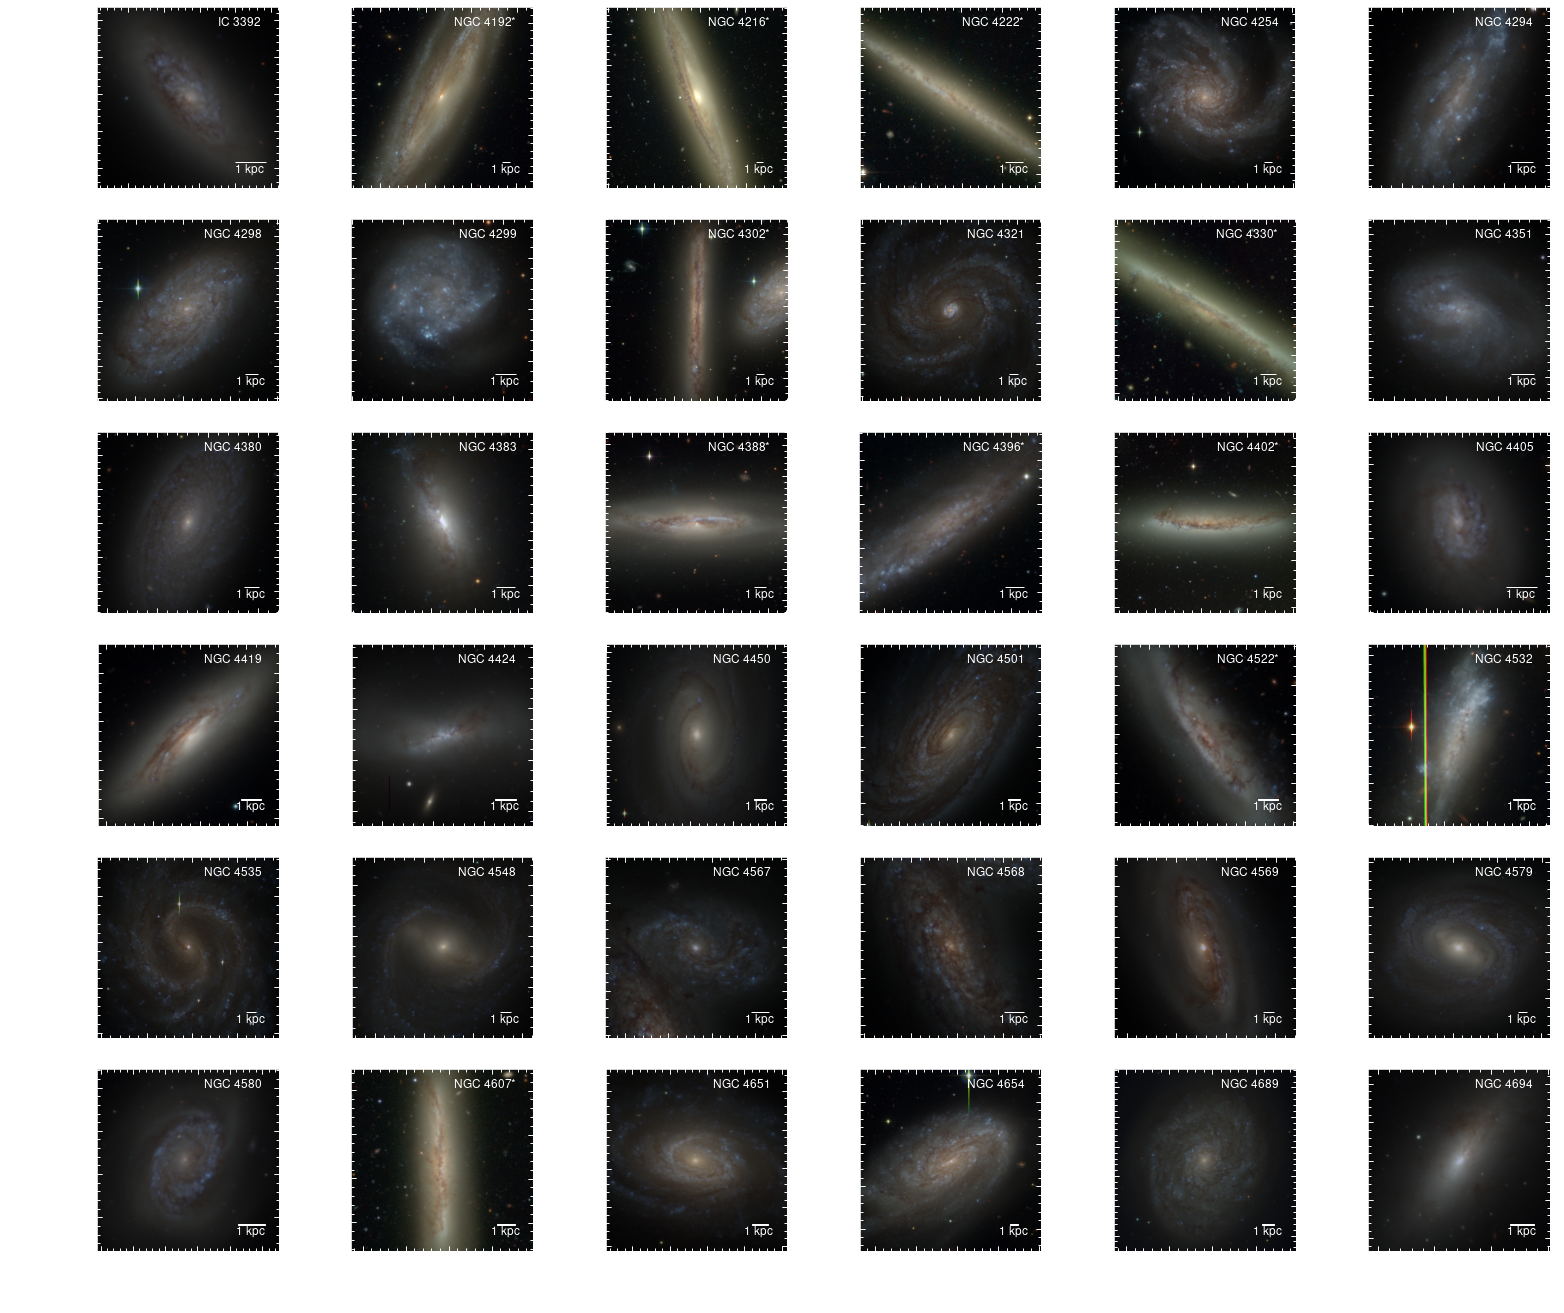

In [5]:
GALAXIES = [
    "IC3392",
    # "NGC4189",  # ignored flag map, but bad results
    "NGC4192",
    "NGC4216",  # has unflagged foreground star
    "NGC4222",
    "NGC4254",
    "NGC4294",
    "NGC4298",
    "NGC4299",
    "NGC4302",
    "NGC4321",
    "NGC4330",
    "NGC4351",
    "NGC4380",
    "NGC4383",
    "NGC4388",
    "NGC4396",
    "NGC4402",
    "NGC4405",
    "NGC4419",
    "NGC4424",
    "NGC4450",
    "NGC4501",
    "NGC4522",
    "NGC4532",
    "NGC4535",
    "NGC4548",
    "NGC4567",
    "NGC4568",
    "NGC4569",
    "NGC4579",
    "NGC4580",
    # "NGC4606",  # flag map too intrusive
    "NGC4607",
    "NGC4651",
    "NGC4654",
    "NGC4689",
    "NGC4694",
]
INCLINATIONS = [
    68,
    # 42,  # ignored flag map, but bad results
    83,
    90,  # has unflagged foreground star
    90,
    39,
    74,
    52,
    14,
    90,
    32,
    90,
    48,
    61,
    56,
    83,
    83,
    80,
    46,
    74,
    61,
    51,
    65,
    82,
    64,
    48,
    37,
    49,
    70,
    69,
    40,
    46,
    # 69,  # flag map too intrusive
    90,
    53,
    61,
    38,
    62,
]  # degrees

NROWS = 6
NCOLS = 6
with plt.style.context("/arc/home/IsaacCheng/coop_f2021/stylesheets/beamer.mplstyle"):
    fig = plt.figure(figsize=(21.7, 18))
    for ax_num, galaxy, i in zip(range(1, NROWS * NCOLS + 1), GALAXIES, INCLINATIONS):
        print("Making", galaxy, "RGB image")
        galpath = f"/arc/home/IsaacCheng/coop_f2021/galaxies/{galaxy}/"
        # 2 arcsec pixel CO data (purely to cutout optical data to match CO data)
        if galaxy == "NGC4321":  # no 9 arcsec data since native is 10 arcsec
            Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3.1/native/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_round_mom0_Kkms-1.fits"
        else:
            Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3/9arcsec/{galaxy}/{galaxy}_7m+tp_co21_pbcorr_9as_round_mom0_Kkms-1.fits"
        Ico_data, co_header = fits.getdata(Ico_path, header=True)
        co_wcs = WCS(co_header)
        # "red" channel (i-band)
        iband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_i_data.fits"
        # "green" channel (g-band)
        gband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_g_data.fits"
        # "blue" channel (u-band)
        uband_path = f"/arc/home/IsaacCheng/coop_f2021/ngvs_data/{galaxy}/{galaxy}_u_data.fits"
        iband_data_uncut, iband_header_uncut = fits.getdata(iband_path, header=True)
        gband_data_uncut, gband_header_uncut = fits.getdata(gband_path, header=True)
        uband_data_uncut, uband_header_uncut = fits.getdata(uband_path, header=True)
        # 
        # Cutout optical data to extent of CO data (optional)
        # 
        iband_data, iband_wcs = fu.cutout_to_target(
            iband_data_uncut, WCS(iband_header_uncut), Ico_data, co_wcs
        )
        gband_data, gband_wcs = fu.cutout_to_target(
            gband_data_uncut, WCS(gband_header_uncut), Ico_data, co_wcs
        )
        uband_data, uband_wcs = fu.cutout_to_target(
            uband_data_uncut, WCS(uband_header_uncut), Ico_data, co_wcs
        )
        # 
        # Median-normalize data on a logarithmic scale and make RGB array
        # 
        rgb_data = pu.lognorm_median(iband_data, gband_data, uband_data, a=1000, norm_factor=1000)
        # 
        # Plot
        # 
        ax = fig.add_subplot(NROWS, NCOLS, ax_num, projection=uband_wcs)
        ax.imshow(rgb_data)
        ax.tick_params(color="w")
        pu.add_scalebar(ax, uband_wcs, dist=GALDIST, color="w")
        # Hide RA and Dec axes labels
        ax.coords[0].set_axislabel(" ", minpad=0)
        ax.coords[1].set_axislabel(" ", minpad=0)
        ax.grid(False)
        # 
        # Add name of galaxy
        # 
        high_i_str = "*" if i >= 80 else ""
        ax.text(
            0.9,
            0.9,
            re.sub(r"(\d+)", " \\1", galaxy) + high_i_str,
            c="w",
            ha="right",
            transform=ax.transAxes,
        )
    fig.text(0.5, 0.0, "RA (J2000)", ha="center", color="w", fontsize=15)
    fig.text(0.0, 0.5, "Dec (J2000)", va="center", color="w", rotation="vertical", fontsize=15)
    plt.subplots_adjust(left=0.045, right=1.0, bottom=0.04, top=1.0, wspace=0.15, hspace=0.17)
    fig.savefig("/arc/home/IsaacCheng/coop_f2021/galaxies/rgb_mosaic_beamer.pdf")
    plt.show()

# (Miscellaneous) Getting the inclinations of NGVS galaxies


In [ ]:
galaxies = [
    "IC3392", "NGC4064", "NGC4189", "NGC4192", "NGC4216", "NGC4222", "NGC4254",
    "NGC4293", "NGC4294", "NGC4298", "NGC4299", "NGC4302", "NGC4321", "NGC4330",
    "NGC4351", "NGC4380", "NGC4383", "NGC4388", "NGC4394", "NGC4396", "NGC4402",
    "NGC4405", "NGC4419", "NGC4424", "NGC4450", "NGC4457", "NGC4501", "NGC4522",
    "NGC4532", "NGC4533", "NGC4535", "NGC4536", "NGC4548", "NGC4561", "NGC4567",
    "NGC4568", "NGC4569", "NGC4579", "NGC4580", "NGC4606", "NGC4607", "NGC4651",
    "NGC4654", "NGC4689", "NGC4694", "NGC4698", "NGC4713", "NGC4772", "NGC4808",
]  # 49 galaxies

inclinations = [
    68, 70, 42, 83, 90, 90, 39, 67, 74, 52, 14, 90, 32, 90, 48, 61, 56, 83, 32, 83, 80,
    46, 74, 61, 51, 37, 65, 82, 64, 80, 48, 74, 37, 28, 49, 70, 69, 40, 46, 69, 90, 53,
    61, 38, 62, 66, 45, 60, 72
]  # degrees

non_NGVS_galaxies = [
    "NGC4064", "NGC4293", "NGC4394", "NGC4457", "NGC4533", "NGC4536",
    "NGC4561", "NGC4698", "NGC4713", "NGC4772", "NGC4808", # "NGC4606"
]

for galaxy, i in zip(galaxies, inclinations):
    if galaxy in non_NGVS_galaxies:
        continue
    print(f"{i},", end=" ")
    # print(f"{i},")

In [24]:
# 
# Get preview of all available matplotlib fonts
# From: https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
# 
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))